# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)   
cities = pd.DataFrame(cities)   
cities.rename(columns={0:"City"}, inplace=True) 
cities

,City
0,torbay
1,port alfred
2,hilo
3,luancheng
4,vanimo
...,...
642,ponta delgada
643,palabuhanratu
644,saint-francois
645,yumen


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
cities["lat"] = ""
cities["lon"] = ""
cities["temp"] = ""
cities["temp_max"] = ""
cities["humidity"] = ""
cities["cloudiness"] = ""
cities["wind_speed"] = ""
cities["country"] = ""

city_counter = 0
api_counter = 0
for index, row in cities.iterrows():
    if api_counter <= 60:
        cityname = row["City"]
        url = f"http://api.openweathermap.org/data/2.5/weather?q={cityname}&units=imperial&appid={weather_api_key}"
        try:
            response = requests.get(url).json()
            cities.loc[index, "City"] = response["name"]
            cities.loc[index, "lat"] = response["coord"]["lat"]
            cities.loc[index, "lon"] = response["coord"]["lon"]
            cities.loc[index, "temp"] = response["main"]["temp"]
            cities.loc[index, "temp_max"] = response["main"]["temp_max"]
            cities.loc[index, "humidity"] = response["main"]["humidity"]
            cities.loc[index, "cloudiness"] = response["clouds"]["all"]
            cities.loc[index, "wind_speed"] = response["wind"]["speed"]
            cities.loc[index,"country"] = response["sys"]["country"]
            city_counter = city_counter + 1
            api_counter = api_counter + 1
            print(city_counter, response["name"])

        except:
            print("not found")
            api_counter = api_counter + 1
    else:
        time.sleep(60)
        api_counter =0

cities.replace("", np.nan, inplace=True)
cities.dropna(how = "any", subset=["lat"], inplace= True)
cities

1 Torbay
2 Port Alfred
3 Hilo
4 Luancheng
5 Vanimo
6 Ruthin
7 Kahului
not found
8 Cherskiy
9 Carnarvon
10 Mimongo
11 Puerto Escondido
12 Chokurdakh
13 Souillac
14 Rikitea
15 Lebu
16 Albany
17 Hobart
18 Simbahan
19 Rechka Vydrino
20 Punta Arenas
21 Hue
22 Avarua
23 Ushuaia
24 Houston
25 Tahe
26 Petropavlovsk-Kamchatskiy
27 Yellowknife
28 Port Elizabeth
29 Casambalangan
30 Ramos Arizpe
31 Busselton
32 Atuona
33 Hermanus
34 Bredasdorp
not found
35 Kavaratti
36 Kununurra
37 Killybegs
38 Cap Malheureux
not found
39 Kavieng
40 Deputatsky
41 Dikson
42 Takhtamygda
43 Cape Town
44 Plettenberg Bay
45 Gladstone
46 Mīnāb
47 Jamestown
48 Ponta do Sol
49 Vardø
50 Nantucket
not found
51 Arraial do Cabo
52 Fare
53 Constitución
54 Dunedin
55 Barrow
56 Norman Wells
57 Ilulissat
58 Iqaluit
59 Mataura
60 Glendive
61 Alice Springs
62 Mahébourg
63 Qaanaaq
64 Marawi
65 Upington
66 Vaini
67 Bluff
68 Port Lincoln
69 Altay
70 Maniitsoq
71 Ancud
72 Mozarlândia
73 Puerto Ayora
74 Aklavik
75 Durango
76 Biak
77 Kat

,City,lat,lon,temp,temp_max,humidity,cloudiness,wind_speed,country
0,Torbay,47.67,-52.73,29.46,30.99,92.0,90.0,8.05,CA
1,Port Alfred,-33.59,26.89,58.03,58.03,72.0,13.0,14.56,ZA
2,Hilo,19.73,-155.09,70.30,73.99,78.0,90.0,5.82,US
3,Luancheng,37.88,114.65,43.45,43.45,50.0,100.0,4.09,CN
4,Vanimo,-2.67,141.30,82.56,82.56,74.0,92.0,3.65,PG
...,...,...,...,...,...,...,...,...,...
640,Bayangol,50.70,103.47,7.11,7.11,71.0,0.0,2.71,RU
641,Port Hardy,50.70,-127.42,42.80,42.80,93.0,90.0,5.66,CA
642,Ponta Delgada,37.73,-25.67,51.80,51.80,71.0,75.0,8.05,PT
644,Saint-François,46.42,3.91,33.80,33.80,74.0,78.0,2.68,FR


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
cities.to_csv("cities.csv")
cities


,City,lat,lon,temp,temp_max,humidity,cloudiness,wind_speed,country
0,Torbay,47.67,-52.73,29.46,30.99,92.0,90.0,8.05,CA
1,Port Alfred,-33.59,26.89,58.03,58.03,72.0,13.0,14.56,ZA
2,Hilo,19.73,-155.09,70.30,73.99,78.0,90.0,5.82,US
3,Luancheng,37.88,114.65,43.45,43.45,50.0,100.0,4.09,CN
4,Vanimo,-2.67,141.30,82.56,82.56,74.0,92.0,3.65,PG
...,...,...,...,...,...,...,...,...,...
640,Bayangol,50.70,103.47,7.11,7.11,71.0,0.0,2.71,RU
641,Port Hardy,50.70,-127.42,42.80,42.80,93.0,90.0,5.66,CA
642,Ponta Delgada,37.73,-25.67,51.80,51.80,71.0,75.0,8.05,PT
644,Saint-François,46.42,3.91,33.80,33.80,74.0,78.0,2.68,FR


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

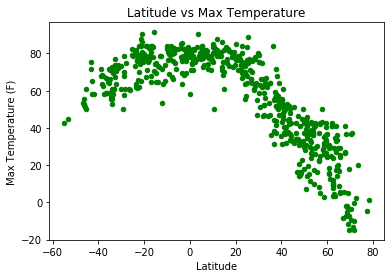

In [12]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["temp_max"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature")
plt.savefig("Lat_v_Temp.png")

#### Latitude vs. Humidity Plot

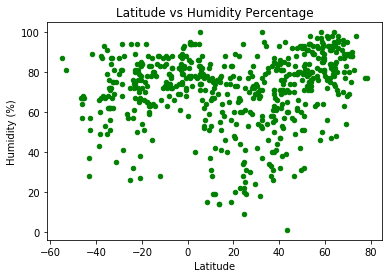

In [13]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["humidity"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity Percentage")
plt.savefig("Lat_v_Humidity.png")

#### Latitude vs. Cloudiness Plot

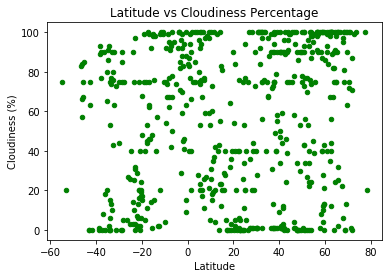

In [14]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["cloudiness"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness Percentage")
plt.savefig("Lat_v_Cloud.png")

#### Latitude vs. Wind Speed Plot

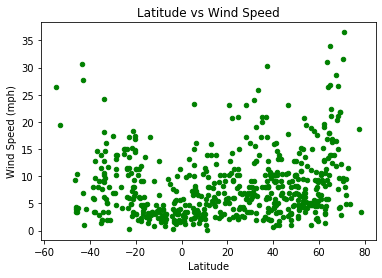

In [15]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["wind_speed"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed")
plt.savefig("Lat_v_Wind.png")

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
NH = cities.loc[cities["lat"] >= 0]
SH = cities.loc[cities["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8987593123372086


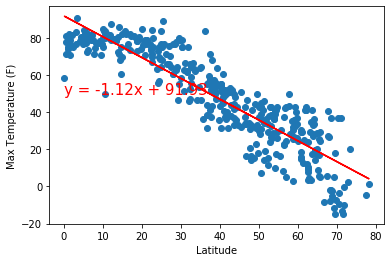

In [18]:
x_values = NH["lat"]
y_values = NH["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6392770660751583


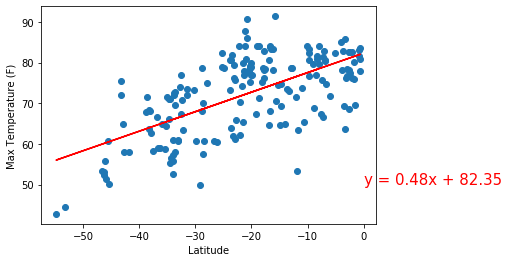

In [19]:
x_values = SH["lat"]
y_values = SH["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30971358498470286


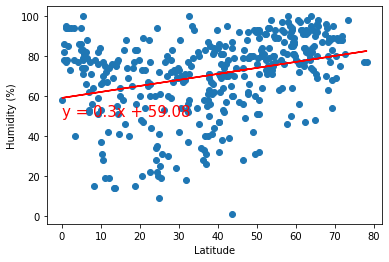

In [20]:
x_values = NH["lat"]
y_values = NH["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.271141681338893


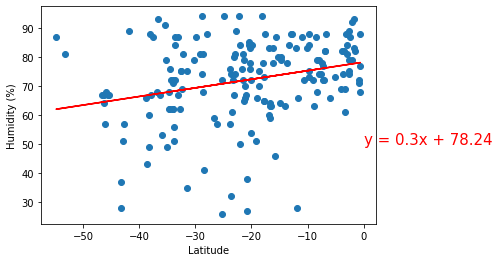

In [21]:
x_values = SH["lat"]
y_values = SH["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14249822679851723


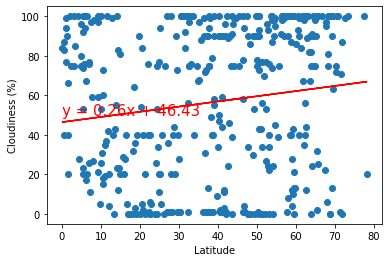

In [22]:
x_values = NH["lat"]
y_values = NH["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24517516566561634


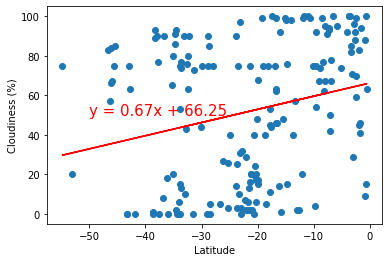

In [23]:
x_values = SH["lat"]
y_values = SH["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2956950262616043


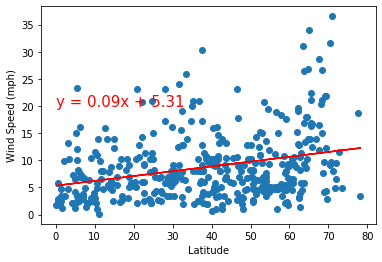

In [24]:
x_values = NH["lat"]
y_values = NH["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4046569762915073


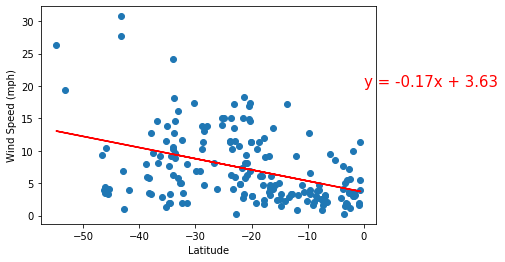

In [25]:
x_values = SH["lat"]
y_values = SH["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")